In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"D:\Data Set\breast-cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Label Encoding

In [3]:
data['diagnosis']=data['diagnosis'].map({'M':0,'B':1})
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Handling Outliers'

In [5]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1

df=data[~((data<(q1-1.5*iqr))|((data>(q3+1.5*iqr)))).any(axis=1)]

In [6]:
data.shape

(569, 32)

In [7]:
df.shape

(346, 32)

### Feature Selection

#### Recursive Feature Elimination

In [8]:
X=data.drop(columns='diagnosis')
y=data['diagnosis']

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator=LogisticRegression()
selector=RFE(estimator,n_features_to_select=12)
selector.fit(X,y)
selected_features=np.array(X.columns)[selector.support_]
selected_features

array(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'texture_se', 'perimeter_se', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst'], dtype=object)

In [10]:
X_new=data[['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'texture_se', 'perimeter_se', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst']]

In [11]:
X_new

,id,radius_mean,texture_mean,perimeter_mean,area_mean,texture_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst
0,842302,17.99,10.38,122.80,1001.0,0.9053,8.589,153.40,25.380,17.33,184.60,2019.0
1,842517,20.57,17.77,132.90,1326.0,0.7339,3.398,74.08,24.990,23.41,158.80,1956.0
2,84300903,19.69,21.25,130.00,1203.0,0.7869,4.585,94.03,23.570,25.53,152.50,1709.0
3,84348301,11.42,20.38,77.58,386.1,1.1560,3.445,27.23,14.910,26.50,98.87,567.7
4,84358402,20.29,14.34,135.10,1297.0,0.7813,5.438,94.44,22.540,16.67,152.20,1575.0
...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,1.2560,7.673,158.70,25.450,26.40,166.10,2027.0
565,926682,20.13,28.25,131.20,1261.0,2.4630,5.203,99.04,23.690,38.25,155.00,1731.0
566,926954,16.60,28.08,108.30,858.1,1.0750,3.425,48.55,18.980,34.12,126.70,1124.0
567,927241,20.60,29.33,140.10,1265.0,1.5950,5.772,86.22,25.740,39.42,184.60,1821.0


<Axes: >

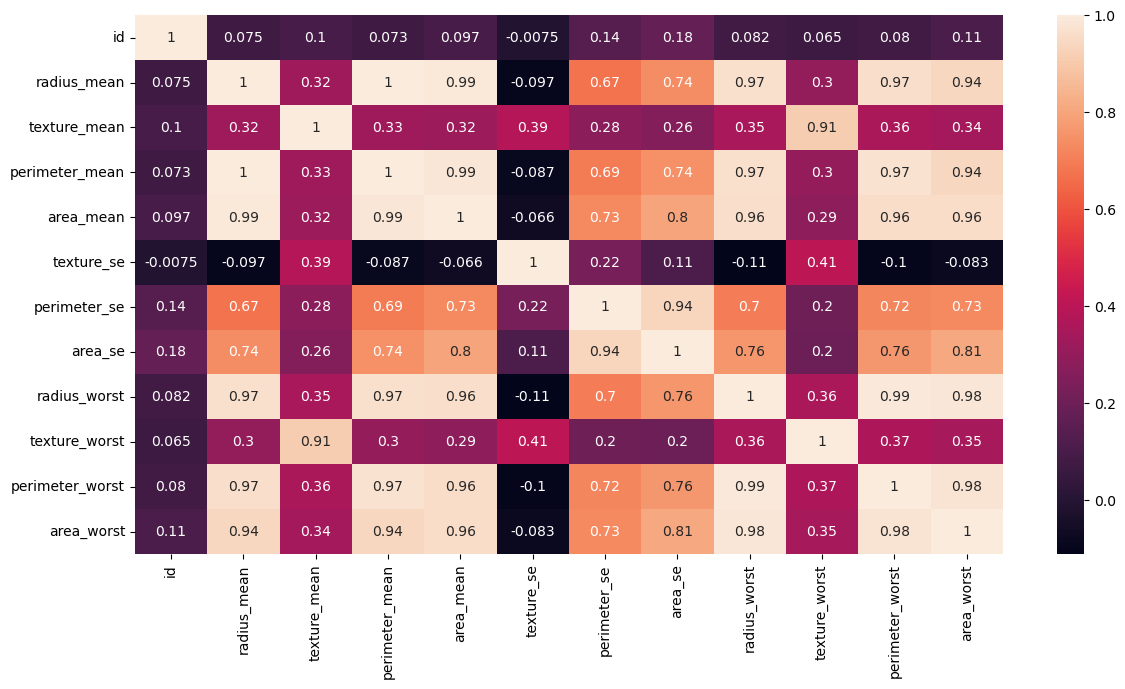

In [12]:
plt.figure(figsize=(14,7))
sns.heatmap(X_new.corr(),annot=True)

#### Random Forest Importence`

In [13]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=12)
model.fit(X,y)

importence=model.feature_importances_

final_data=pd.DataFrame({'Features':pd.DataFrame(X).columns,'Importence':importence})
final_data=final_data.sort_values(by='Importence',ascending=False)

top_features=final_data.head(10)
print(top_features)

                Features  Importence
28  concave points_worst    0.251949
4              area_mean    0.166463
8    concave points_mean    0.140044
27       concavity_worst    0.070940
21          radius_worst    0.058172
7         concavity_mean    0.056713
1            radius_mean    0.052822
22         texture_worst    0.023059
23       perimeter_worst    0.021747
3         perimeter_mean    0.018098


In [14]:
X_new1=data[['area_worst','perimeter_worst','radius_worst','concave points_mean','area_mean','area_se','radius_mean','concavity_worst','compactness_worst','concave points_worst']]

<Axes: >

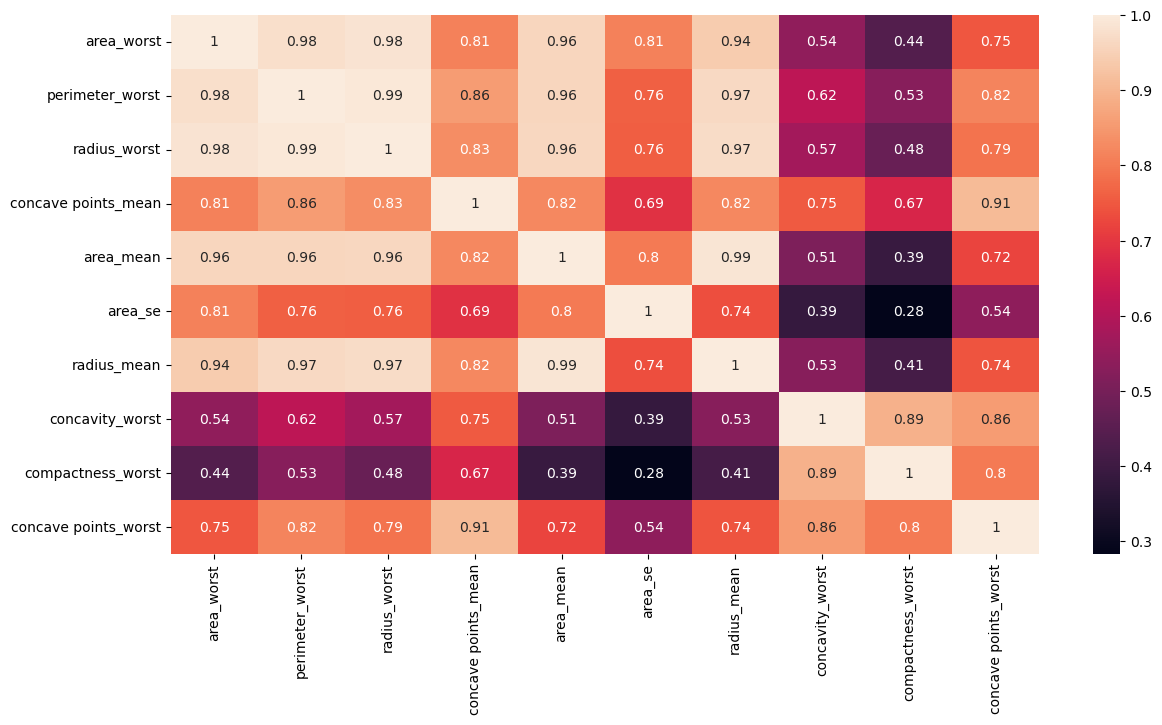

In [15]:
plt.figure(figsize=(14,7))
sns.heatmap(X_new1.corr(),annot=True)

### Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X_new)
X_scaler

array([[-0.23640517,  1.09706398, -2.07333501, ..., -1.35929347,
         2.30360062,  2.00123749],
       [-0.23640344,  1.82982061, -0.35363241, ..., -0.36920322,
         1.53512599,  1.89048899],
       [ 0.43174109,  1.57988811,  0.45618695, ..., -0.02397438,
         1.34747521,  1.45628455],
       ...,
       [-0.23572747,  0.70228425,  2.0455738 , ...,  1.37485378,
         0.57900058,  0.42790561],
       [-0.23572517,  1.83834103,  2.33645719, ...,  2.23792588,
         2.30360062,  1.65317077],
       [-0.24240586, -1.80840125,  1.22179204, ...,  0.76418957,
        -1.43273495, -1.07581292]])

In [17]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X_scaler,y,test_size=0.3,random_state=42)

model=LogisticRegression()
model.fit(Xtrain,ytrain)

LogisticRegression()

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [19]:
ypred=model.predict(Xtest)

In [20]:
acc=accuracy_score(ytest,ypred)
acc

0.9590643274853801

In [21]:
metrix=confusion_matrix(ytest,ypred)
metrix

array([[ 58,   5],
       [  2, 106]], dtype=int64)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

Kmodel=KNeighborsClassifier(n_neighbors=5)
Kmodel.fit(Xtrain,ytrain)

KNeighborsClassifier()

In [31]:
kypred=Kmodel.predict(Xtest)

In [32]:
acc_k=accuracy_score(ytest,kypred)
acc_k

0.9707602339181286

In [33]:
matrix_k=confusion_matrix(ytest,kypred)
matrix_k

array([[ 59,   4],
       [  1, 107]], dtype=int64)